In [73]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
#from keras.optimizers import SGD, Adam
from tensorflow.keras.optimizers import SGD
from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [74]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [75]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [76]:
#Read dataset with pandas (python)
my_data = pd.read_csv('D:/A_Z Handwritten Data.csv').astype('float32')

In [77]:
my_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
my_frame = pd.DataFrame(my_data)
my_frame.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
my_frame.shape

(372450, 785)

In [80]:
my_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [81]:
my_frame.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.736685,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490786,0.517295,0.421331,0.419179,0.385566,0.319819,0.208941,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [82]:
my_frame.isnull().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [83]:
#Split x and y column from dataset
x = my_frame.drop('0', axis = 1)
y = my_frame['0']

In [84]:
#Reshaping images from dataset
# we are reshaping the train & test image data so that they can be displayed as an image, 
# as initially in the CSV file they were present as 784 columns of pixel data. So we convert it to 28×28 pixels.

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
#x_train = np.reshape(x_train.values, (x_train.shape[0], 28, 28))
#x_test = np.reshape(x_test.values, (x_test.shape[0], 28, 28))

#print('Train Data Shape:', x_train.shape)
#print('Test Data Shape:', x_test.shape)
####------------------------------------------------------------------------------------------------------------------------#####
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# If x is a pandas DataFrame or Series, convert it to a NumPy array
x_train = np.array(x_train)
x_test = np.array(x_test)

# Reshape the data to include the channel dimension (1 for grayscale)
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

# Normalize the pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

print('Train Data Shape:', x_train.shape)
print('Test Data Shape:', x_test.shape)

Train Data Shape: (297960, 28, 28, 1)
Test Data Shape: (74490, 28, 28, 1)


In [17]:
#Creating dictionary of alphabets with indexes
# All the labels are present in the form of floating point values, that we convert to integer values, 
# & so we create a dictionary word_dict to map the integer values with the characters.

word_dict = {
    0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'
}

C:\Users\USER\AppData\Local\Temp\ipykernel_21148\2217234370.py:11: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  y_integer = np.int0(y)


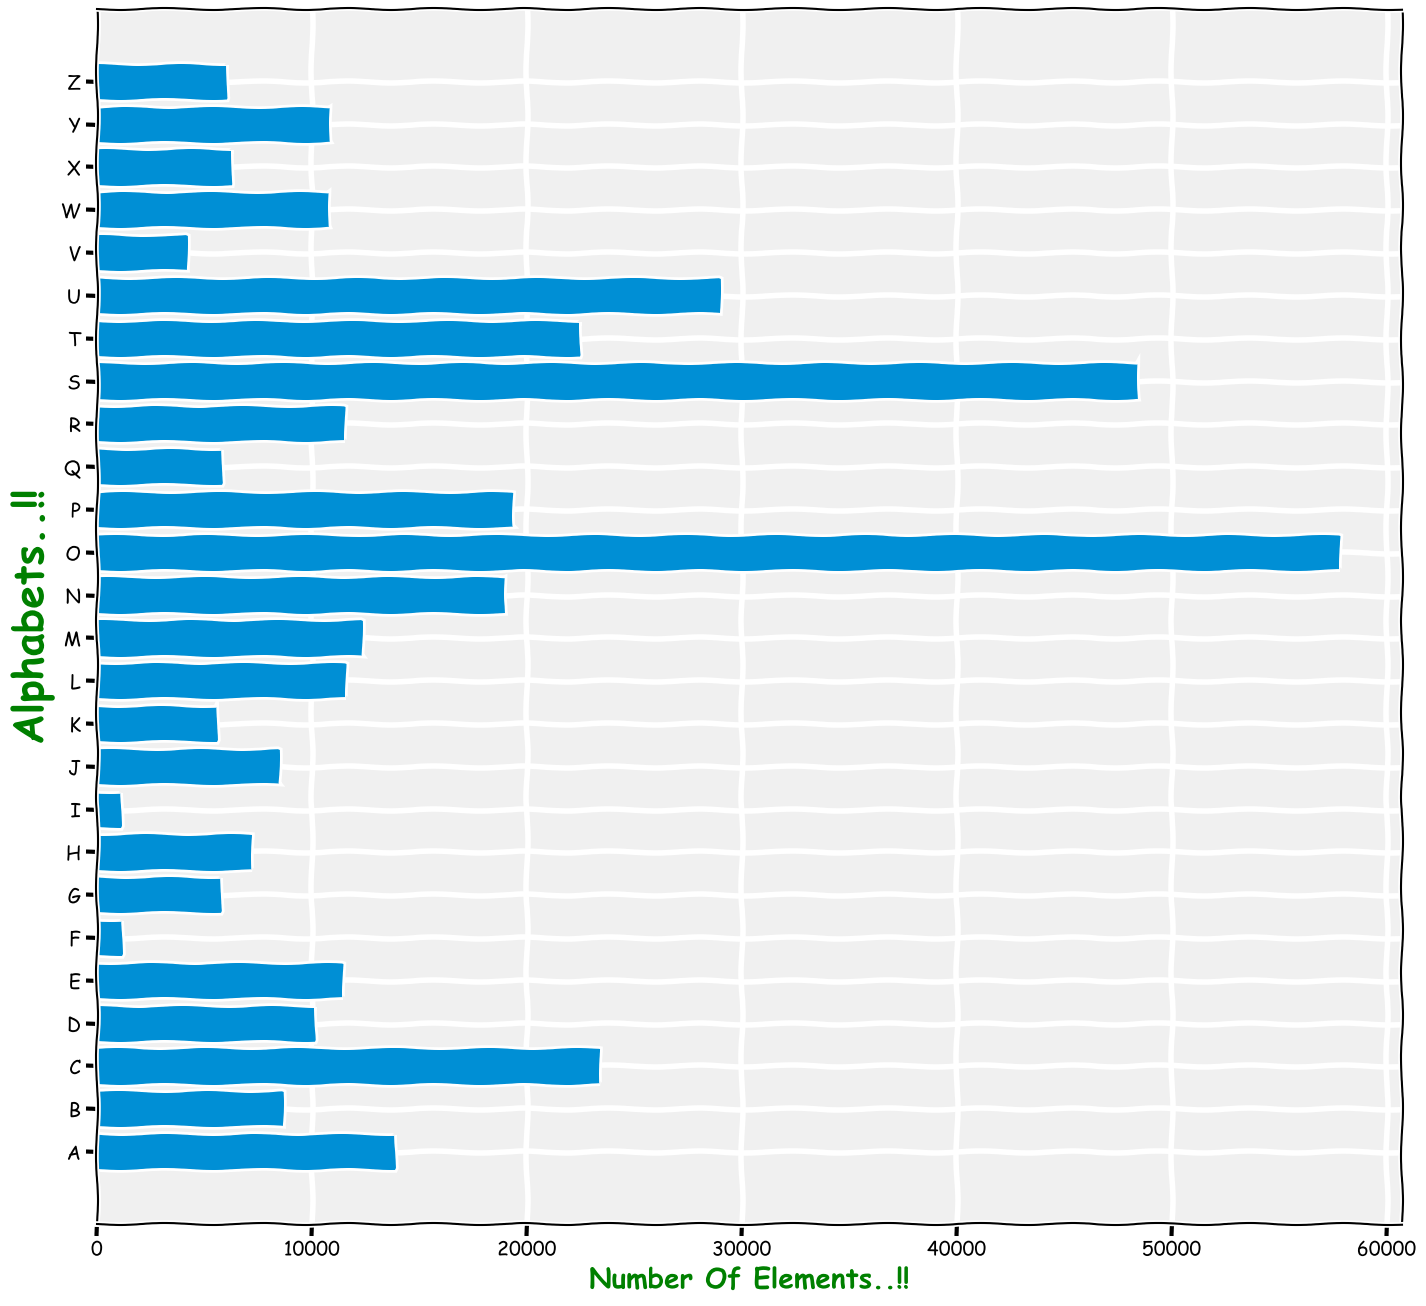

In [87]:
#Plotting number of alphabets from dataset
# Plotting the number of alphabets in the dataset
# 1): Firstly we convert the labels into integer values and append into the count list according to the label. 
#     This count list has the number of images present in the dataset belonging to each alphabet.
# 2): Now we create a list – alphabets containing all the characters using the values() function of the dictionary.
# 3): Now using the count & alphabets lists we draw the horizontal bar plot.

plt.style.use('fivethirtyeight')
plt.xkcd()

y_integer = np.int0(y)
count = np.zeros(26, dtype = 'int')

for i in y_integer:
    count[i] += 1
    
alphabets = []

for i in word_dict.values():
    alphabets.append(i)
    
fig, ax = plt.subplots(1, 1, figsize = (15, 15))
ax.barh(alphabets, count)

plt.xlabel('Number Of Elements..!!', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Alphabets..!!', fontsize = 30, fontweight = 'bold', color = 'green')
plt.grid()
plt.show()

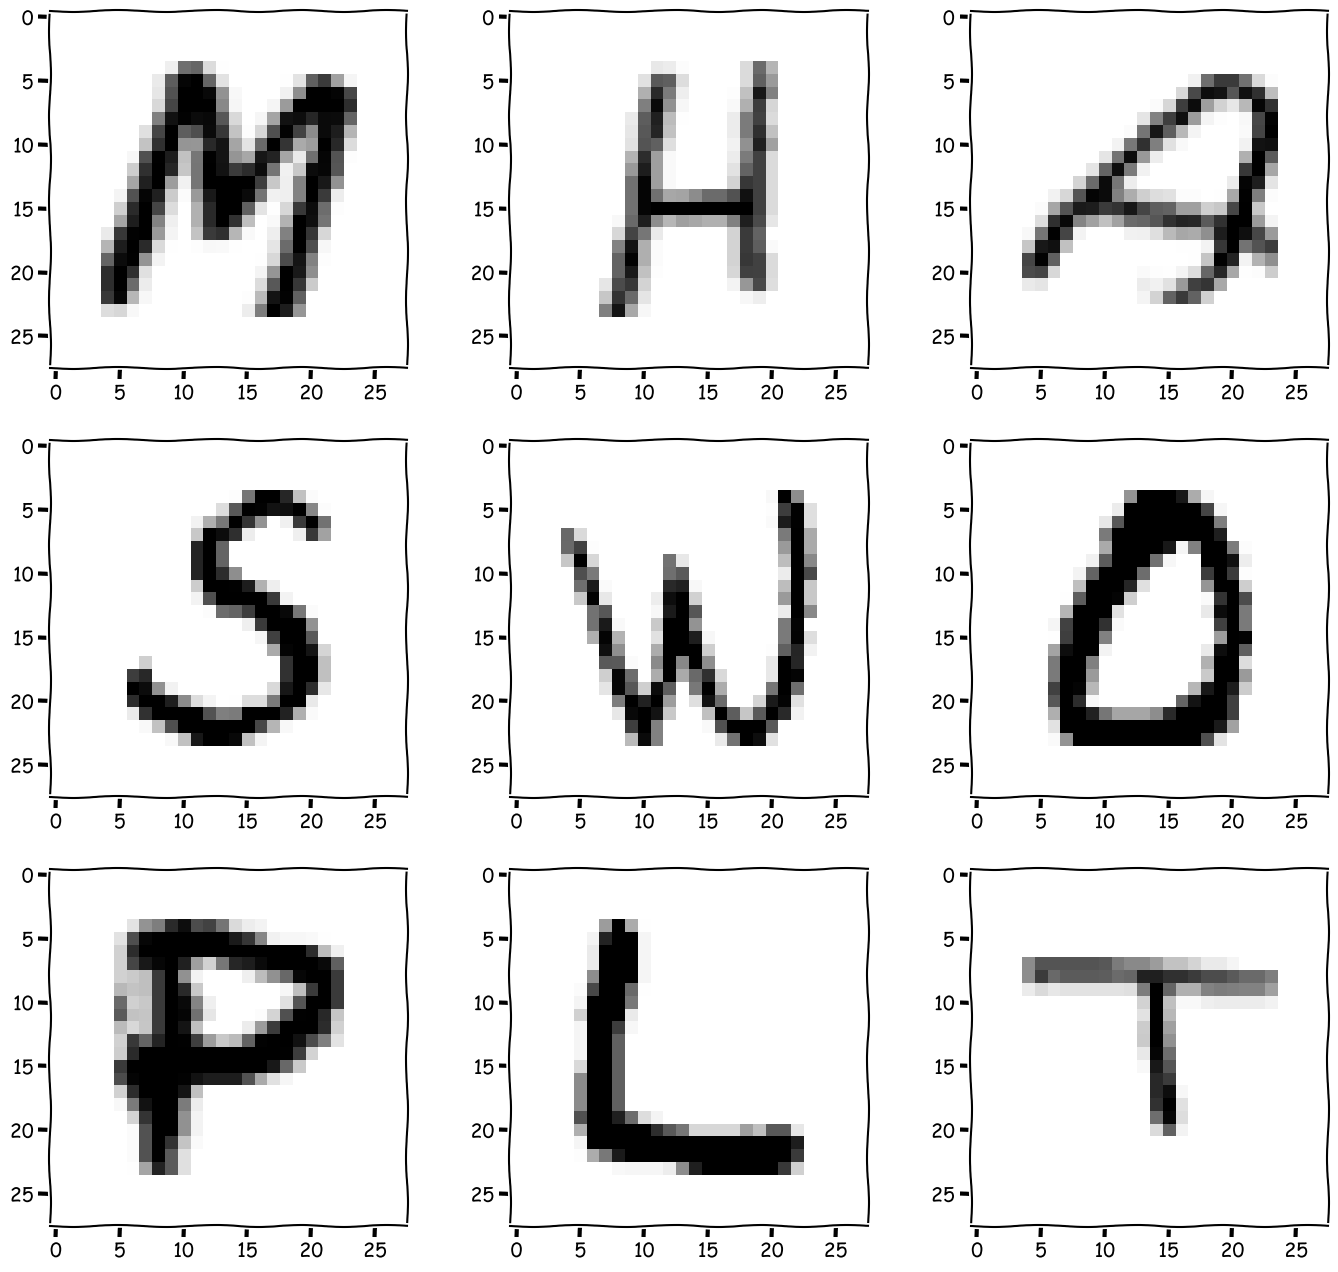

In [88]:
#Shuffle images from dataset with shuffle() function to show random images
# Now we shuffle the data with the shuffle() function to show the random images..

plt.style.use('fivethirtyeight')
plt.xkcd()

shuff = shuffle(x_train[:100])
fig, ax = plt.subplots(3, 3, figsize = (15, 15))
axes = ax.flatten()

for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap = 'Greys')
plt.show()

In [89]:
#Reshaping train & test images from dataset to put in Deep Learning Model
# Reshaping the training & test dataset so that it can be put in the model
# Now we reshape the train & test image dataset so that they can be put in the model.
# New shape of train data: (297960, 28, 28, 1)
# New shape of test data: (74490, 28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print("New shape of train data:", x_train.shape)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
print("New shape of test data:", x_test.shape)

New shape of train data: (297960, 28, 28, 1)
New shape of test data: (74490, 28, 28, 1)


In [90]:
#Convert float values into categorical values
# Here we convert the single float values to categorical values. 
# This is done as the CNN model takes input of labels & generates the output as a vector of probabilities.

# What is CNN?
#   CNN stands for Convolutional Neural Networks 
#   that are used to extract the features of the images using several layers of filters.

categorical_train = to_categorical(y_train, num_classes = 26, )
print("New shape of train labels:", categorical_train.shape)

categorical_test = to_categorical(y_test, num_classes = 26, )
print("New shape of test labels:", categorical_test.shape)

New shape of train labels: (297960, 26)
New shape of test labels: (74490, 26)


In [22]:
pip install keras-preprocessing

Note: you may need to restart the kernel to use updated packages.


In [91]:
#Implementation of Deep Learning Model
# We have the Sequential model that we designed for training the model over the training dataset.
# The model created is as follows:

# Sequential() Model: A Sequential model is appropriate for a plain stack of layers 
# where each layer has exactly one input tensor and one output tensor.

# MaxPool2D: The input along its spatial dimensions (height and width) by taking the maximum value over an input window
#(of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.
from keras.layers import Input

my_model = Sequential()

# Use Input layer to define input shape
my_model.add(Input(shape=(28, 28, 1)))  

my_model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
my_model.add(MaxPool2D(pool_size=(2, 2), strides=2))

my_model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'))
my_model.add(MaxPool2D(pool_size = (2, 2), strides = 2))

my_model.add(Flatten())

my_model.add(Dense(64, activation = "relu"))
my_model.add(Dense(128, activation = "relu"))

my_model.add(Dense(26, activation = "softmax"))

In [92]:
#Compiling the Model 
# 1): Here we are compiling the model, where we define the optimizing function & the loss function to be used for fitting.
# 2): The optimizing function used is Adam, that is a combination of RMSprop & Adagram optimizing algorithms.
# 3): The dataset is very large so we are training for only a single epoch, 
#     however, as required we can even train it for multiple epochs 
#     (which is recommended for character recognition for better accuracy).

my_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = my_model.fit(x_train, categorical_train, epochs = 1, validation_data = (x_test, categorical_test))

9312/9312 ━━━━━━━━━━━━━━━━━━━━ 109s 11ms/step - accuracy: 0.9180 - loss: 0.2885 - val_accuracy: 0.9845 - val_loss: 0.0546


In [93]:
#Getting summary of Model
# Now we are getting the model summary that tells us what were the different layers defined in the model &
# also we save the model using model.save() function.

my_model.summary()
my_model.save('model_hand.keras')

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

In [94]:
#Find accuracy, losses of Model
# we print out the training & validation accuracies along with the training & validation losses for character recognition.

print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9845079779624939]
The training accuracy is : [0.9635085463523865]
The validation loss is : [0.0546250194311142]
The training loss is : [0.12835095822811127]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


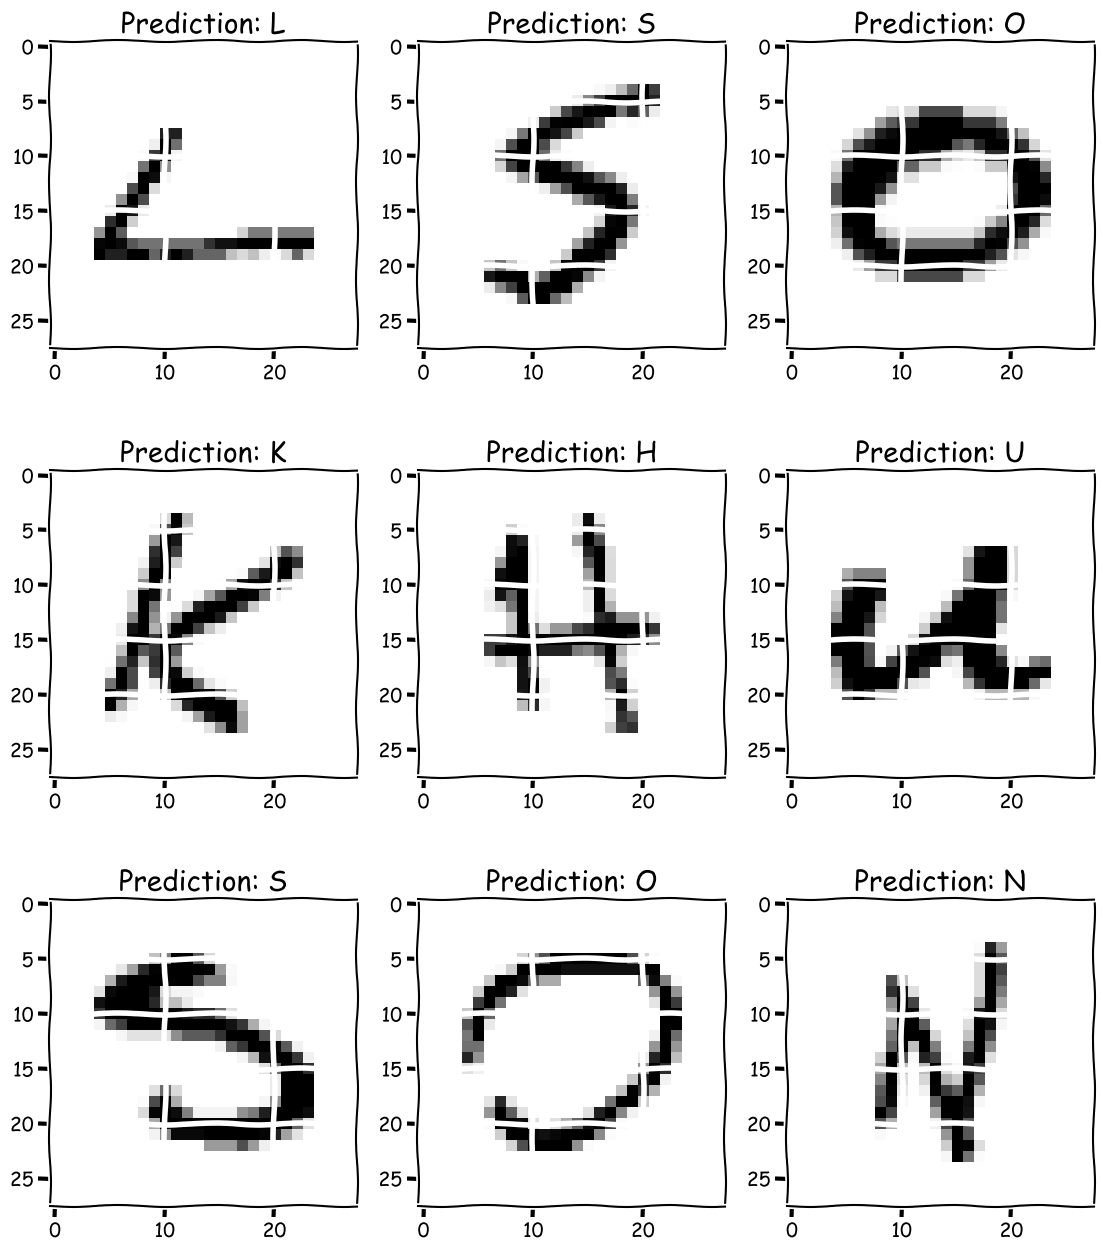

In [95]:
#Finally, make predictions on the test data
# Here we are creating 9 subplots of (3,3) shape & visualize some of the test dataset alphabets along with their predictions, 
# that are made using the model.predict() function for text recognition.

plt.style.use('fivethirtyeight')
plt.xkcd()

fig, axes = plt.subplots(3, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(x_test[i], (28, 28))
    ax.imshow(img, cmap="Greys")
    
    # Reshape the image for prediction
    img_final = np.reshape(img, (1, 28, 28, 1)) 
    
    pred = word_dict[np.argmax(my_model.predict(img_final))]  # Assuming 'my_model' is defined
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [43]:
# make a ui

In [44]:
pip install gradio==3.32.0

In [96]:
import tkinter as tk
from tkinter import Canvas
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from keras.layers import TFSMLayer

class HandwritingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Handwritten Letter Recognition")

        # Load your model
        try:
            # Attempt to load .h5 or .keras model
            self.model = load_model('model_hand.keras')  # Replace with your model path
        except ValueError as e:
            print(f"Error loading model: {e}")
            # Fallback for TensorFlow SavedModel format
            self.model = TFSMLayer('my_model_directory', call_endpoint='serving_default')

        # Create a canvas to draw on
        self.canvas = Canvas(root, width=200, height=200, bg='white')
        self.canvas.grid(row=0, column=0, pady=2, sticky="w", columnspan=4)

        # Buttons
        self.predict_button = tk.Button(root, text="Predict", command=self.predict)
        self.predict_button.grid(row=1, column=0)
        self.clear_button = tk.Button(root, text="Clear", command=self.clear_canvas)
        self.clear_button.grid(row=1, column=1)

        # Bind mouse events to the canvas
        self.canvas.bind("<B1-Motion>", self.draw)

        # Initialize an empty array to store the drawing
        self.image_array = np.zeros((200, 200))

    def draw(self, event):
        # Draw on the canvas
        x, y = event.x, event.y
        self.canvas.create_oval(x, y, x+5, y+5, fill='black')
        # Update the numpy array with the drawn content
        self.image_array[y:y+5, x:x+5] = 255  # Set pixel value to 255 for white on black background

    def process_image(self, image_array):
        # Resize the image to 28x28 pixels (or the size your model expects)
        resized_image = cv2.resize(image_array, (28, 28))

        # Normalize the pixel values to be between 0 and 1
        normalized_image = resized_image / 255.0

        # Reshape to add a batch dimension and a single channel
        reshaped_image = normalized_image.reshape(1, 28, 28, 1)

        return reshaped_image

    def predict(self):
        # Process the image array and predict the letter
        processed_image = self.process_image(self.image_array)

        # Debugging info: Inspect the processed image shape and content
        print("Processed Image Shape:", processed_image.shape)
        print("Processed Image Data:\n", processed_image)

        # Make the prediction using the model
        prediction = self.model.predict(processed_image)
        predicted_index = np.argmax(prediction, axis=1)[0]

        # Convert the predicted index to a letter (assuming 'A' is class 0, 'B' is class 1, etc.)
        predicted_letter = chr(predicted_index + ord('A'))

        # Display the predicted letter
        print(f"Predicted Letter: {predicted_letter}")

    def clear_canvas(self):
        # Clear the canvas and reset the image array
        self.canvas.delete("all")
        self.image_array = np.zeros((200, 200))

# Run the app
if __name__ == "__main__":
    root = tk.Tk()
    app = HandwritingApp(root)
    root.mainloop()


Processed Image Shape: (1, 28, 28, 1)
Processed Image Data:
 [[[[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   

In [102]:
import tkinter as tk
from tkinter import Canvas, Label
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from keras.layers import TFSMLayer

class HandwritingApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Handwritten Letter Recognition")

        # Load your model
        try:
            # Attempt to load .h5 or .keras model
            self.model = load_model('model_hand.keras')  # Replace with your model path
        except ValueError as e:
            print(f"Error loading model: {e}")
            # Fallback for TensorFlow SavedModel format
            self.model = TFSMLayer('my_model_directory', call_endpoint='serving_default')

        # Create a canvas to draw on
        self.canvas = Canvas(root, width=200, height=200, bg='white')
        self.canvas.grid(row=0, column=0, pady=2, sticky="w", columnspan=4)

        # Buttons
        self.predict_button = tk.Button(root, text="Predict", command=self.predict)
        self.predict_button.grid(row=1, column=0)
        self.clear_button = tk.Button(root, text="Clear", command=self.clear_canvas)
        self.clear_button.grid(row=1, column=1)

        # Label to display the predicted letter
        self.result_label = Label(root, text="", font=("Helvetica", 16))
        self.result_label.grid(row=2, column=0, columnspan=4, pady=10)

        # Bind mouse events to the canvas
        self.canvas.bind("<B1-Motion>", self.draw)

        # Initialize an empty array to store the drawing
        self.image_array = np.zeros((200, 200))

    def draw(self, event):
        # Draw on the canvas
        x, y = event.x, event.y
        self.canvas.create_oval(x, y, x+5, y+5, fill='black')
        # Update the numpy array with the drawn content
        self.image_array[y:y+5, x:x+5] = 255  # Set pixel value to 255 for white on black background

    def process_image(self, image_array):
        # Resize the image to 28x28 pixels (or the size your model expects)
        resized_image = cv2.resize(image_array, (28, 28))

        # Normalize the pixel values to be between 0 and 1
        normalized_image = resized_image / 255.0

        # Reshape to add a batch dimension and a single channel
        reshaped_image = normalized_image.reshape(1, 28, 28, 1)

        return reshaped_image

    def predict(self):
        # Process the image array and predict the letter
        processed_image = self.process_image(self.image_array)

        # Debugging info: Inspect the processed image shape and content
        print("Processed Image Shape:", processed_image.shape)
        print("Processed Image Data:\n", processed_image)

        # Make the prediction using the model
        prediction = self.model.predict(processed_image)
        predicted_index = np.argmax(prediction, axis=1)[0]

        # Convert the predicted index to a letter (assuming 'A' is class 0, 'B' is class 1, etc.)
        predicted_letter = chr(predicted_index + ord('A'))

        # Display the predicted letter in the label
        self.result_label.config(text=f"Predicted Letter: {predicted_letter}")

        # Also print it in the console (optional)
        print(f"Predicted Letter: {predicted_letter}")

    def clear_canvas(self):
        # Clear the canvas and reset the image array
        self.canvas.delete("all")
        self.image_array = np.zeros((200, 200))

        # Clear the result label
        self.result_label.config(text="")

# Run the app
if __name__ == "__main__":
    root = tk.Tk()
    app = HandwritingApp(root)
    root.mainloop()


Processed Image Shape: (1, 28, 28, 1)
Processed Image Data:
 [[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0. 